Главная задача SVM - найти уравнение разделяющей гиперплоскости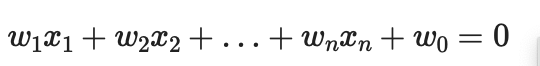
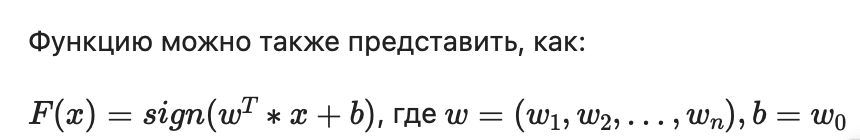

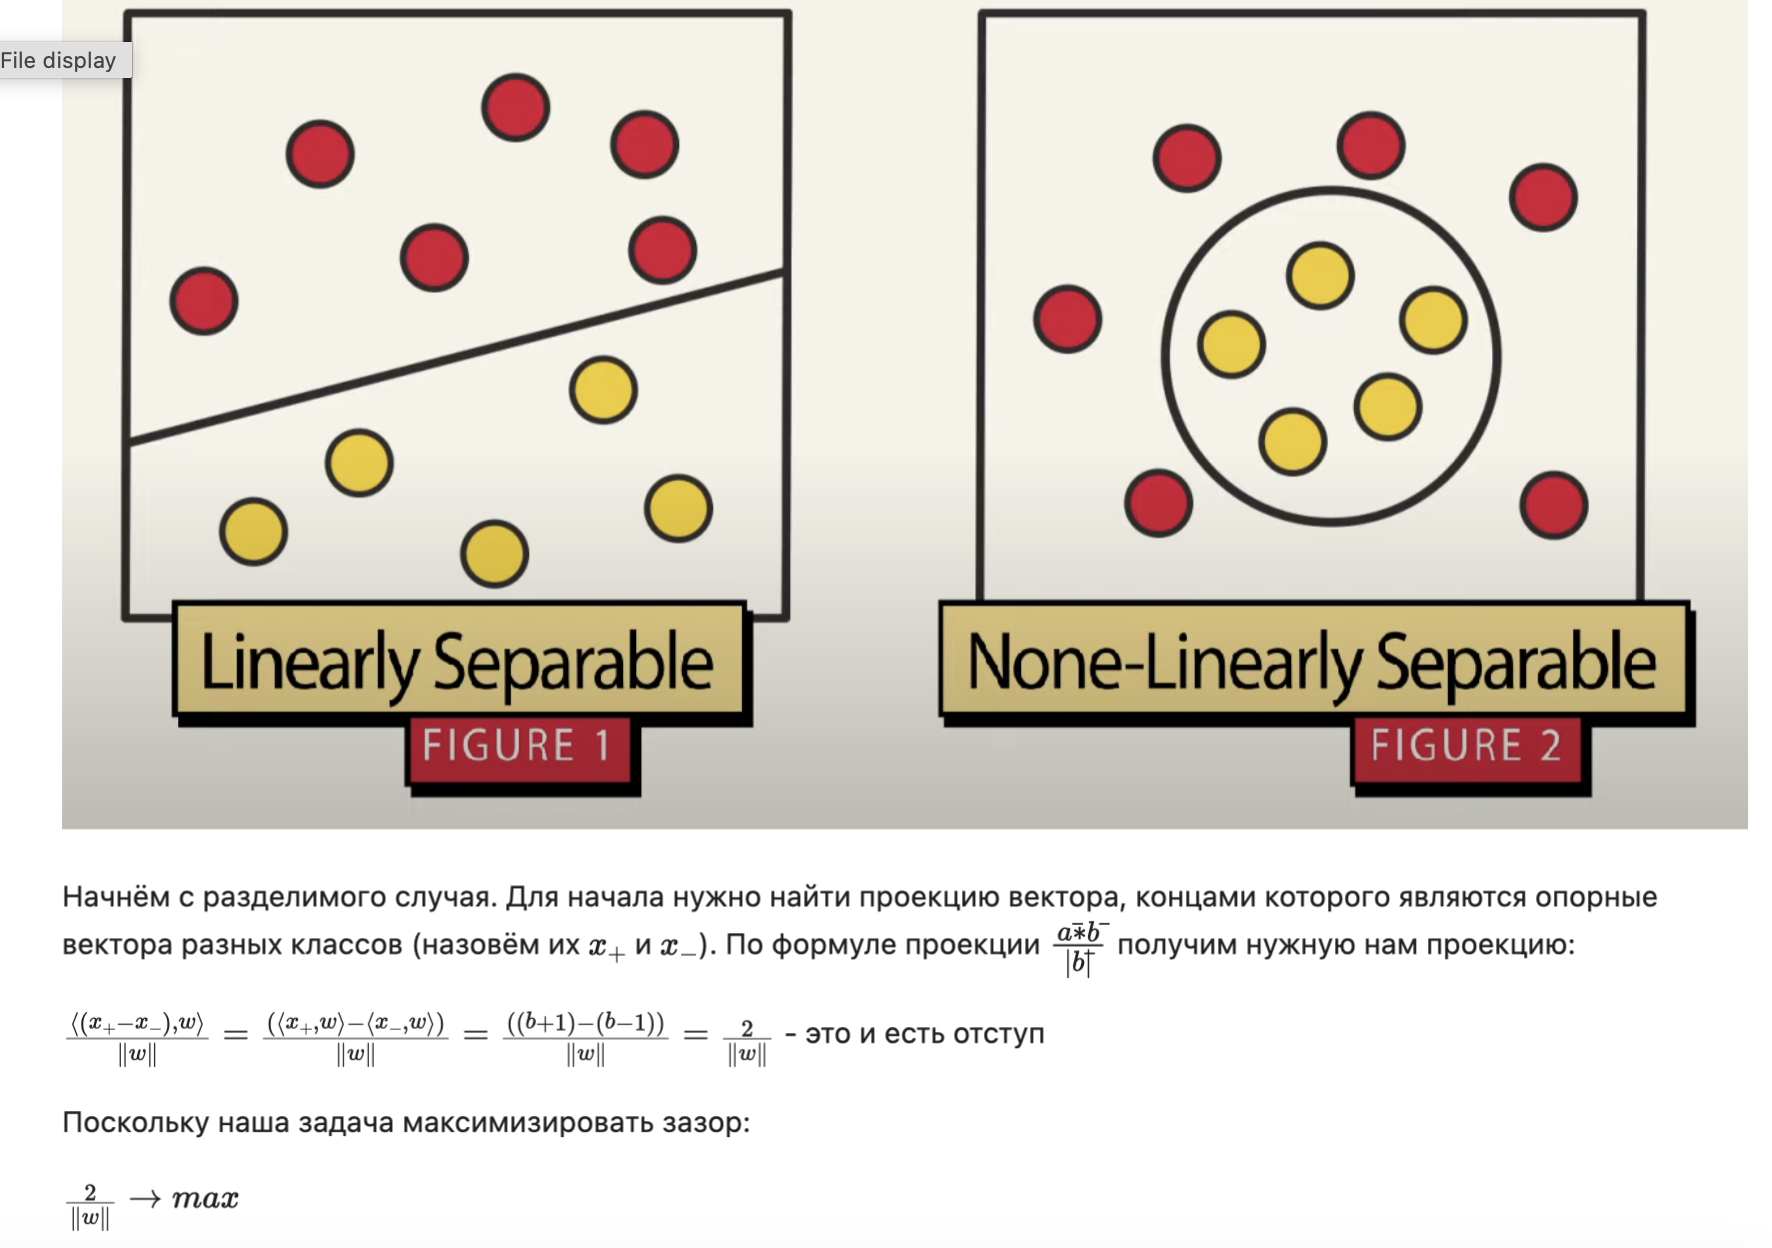

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В итоге надо найти гиперплоскость - 1/2 *||w||^2 при ограничении yi * (w*xu + b) >= 1

In [27]:
class SVM():
  def __init__(self, learning_rate = 0.001, lambda_param = 0.1, n_iters = 10000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None
    self.losses = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    y_true = np.where( y<= 0, -1, 1)
    self.w = np.zeros(n_features)
    self.b = 0
    loss = []
    for i in range(self.n_iters):
      curr = 0 # для вычисления функции потерь
      for idx, x_i in enumerate(X):#Во внутреннем цикле обрабатываем каждый пример по отдельности — стохастический подход.
        condition = y_true[idx] * (np.dot(x_i, self.w) + self.b) >= 1 # Условие маржин: на правильной стороне ли объект
        curr += self.__loss(y_true[idx], x_i)
        if condition:
          self.w = self.w - self.lr * (2 * self.w * self.lambda_param)
        else:
          self.w = self.w - self.lr * (2 * self.w * self.lambda_param - np.dot(y_true[idx], x_i)) # добавляем субградиент - это производная по hinge loss
          self.b = self.b - self.lr * y_true[idx]

      loss.append(curr)

    self.losses = loss


  def predict(self, X):
    approx = np.dot(X, self.w) + self.b # f(x)=w⋅x+b
    return np.sign(approx) # +1 → объект принадлежит первому классу и наоборот

  def __loss(self, y, X):
    return max(0, 1 - y * (np.dot(self.w, X) + self.b)) + self.lambda_param * np.dot(self.w, self.w)

  def get_weights(self):
    return self.w

  def get_losses(self):
    return self.losses



In [3]:
def true_positive(real, prediction):
  tp = 0
  for re, pred in zip(real, prediction):
    if re == 1 and pred == 1:
      tp += 1
  return tp

def false_positive(real, prediction):
  fp = 0
  for re, pred in zip(real, prediction):
    if re == 0 and pred == 1:
      fp += 1
  return fp

def false_negative(real, prediction):
  fn = 0
  for re, pred in zip(real, prediction):
    if pred == 0 and re == 1:
      fn += 1
  return fn

def true_negative(real, prediction):
  tn = 0
  for re, pred in zip(real, prediction):
    if re == 0 and pred == 0:
      tn += 1
  return tn




In [4]:
def accuracy(real, prediction):
  tp = true_positive(real, prediction)
  fp = false_positive(real, prediction)
  fn = false_negative(real, prediction)
  tn = true_negative(real, prediction)
  acc_score = (tp + tn) / (tp + tn + fp + fn)
  return acc_score

def precision(real, prediction):
  tp = true_positive(real, prediction)
  fp = false_positive(real, prediction)
  prec_score = tp/(tp+fp)
  return prec_score

def recall(real, prediction):
  tp = true_positive(real, prediction)
  fn = false_negative(real, prediction)
  rec_score = tp/(tp + fn)
  return rec_score

def f1(real, prediction):
  re = recall(real, prediction)
  prec = precision(real, prediction)
  f1_score = 2 * prec * re/ (prec + re)
  return f1_score

In [5]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/h2fdjewr1zgrid4/Social_Network_Ads.csv?dl=0'

In [6]:

data = pd.read_csv('train.csv')

In [7]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [8]:

y = data['Purchased']
X = data.drop(columns='Purchased')


In [11]:
num_data = X.select_dtypes(include=[np.number])
num_features = num_data.columns

cat_data = X.select_dtypes(include=['object', 'category'])
cat_features = cat_data.columns


In [12]:
X = pd.concat([X[num_features], pd.get_dummies(X[cat_features])], axis=1)
X.sample(3)

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
247,15775590,57.0,122000.0,True,False
264,15600379,48.0,90000.0,False,True
166,15762228,22.0,55000.0,True,False


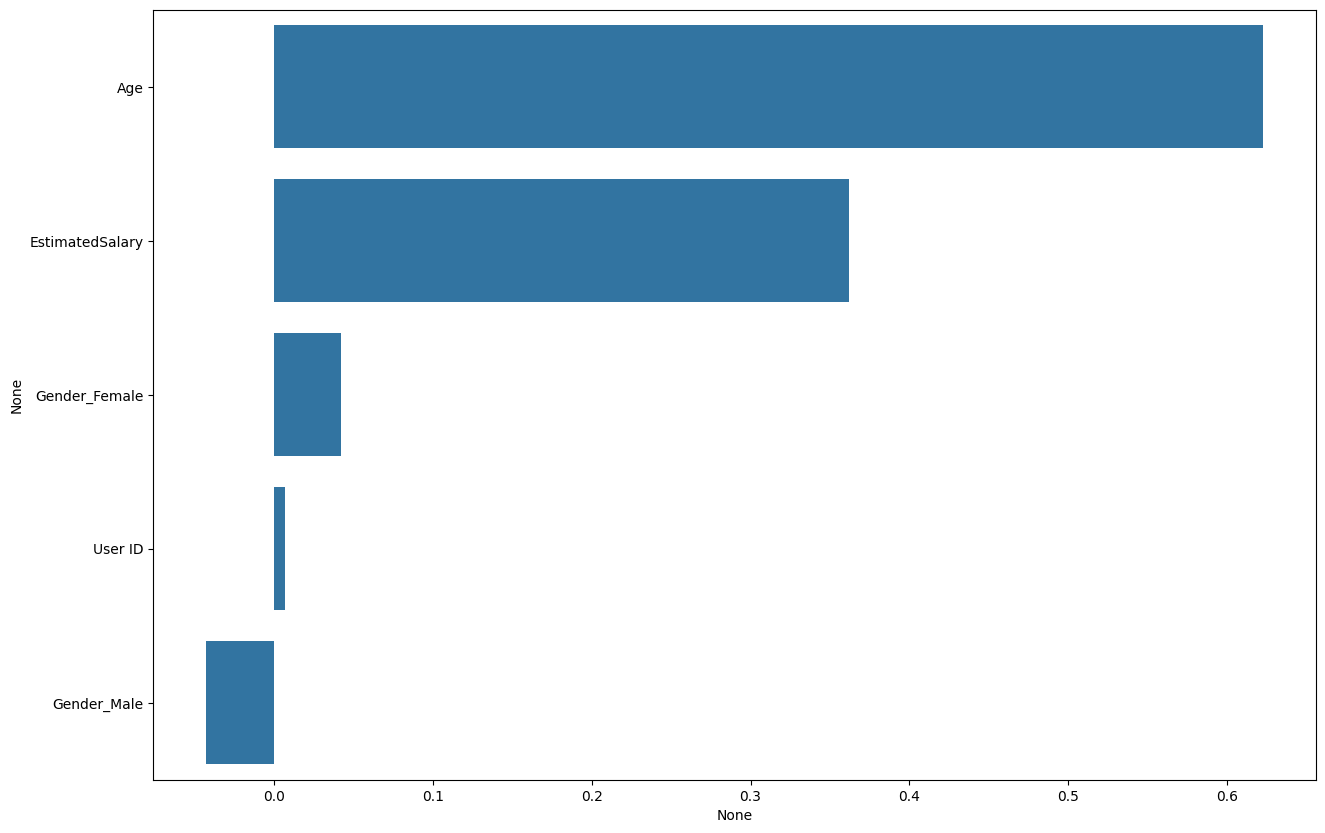

In [13]:


correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)


In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:


scal = StandardScaler()
X[num_features] = scal.fit_transform(X[num_features])


In [16]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import svm

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)


In [18]:

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [19]:

from sklearn import metrics
import time

In [20]:
clf1 = svm.SVC(kernel = 'linear', random_state=0)
start = time.time()
clf1.fit(X_train, y_train)
stop = time.time()
y_pred = clf1.predict(X_test)


In [21]:

print(f"Training time: {stop - start}s")

Training time: 0.014953374862670898s


In [22]:

print('f1_test = ', metrics.f1_score(y_test, y_pred))
print('my_f1_test = ', f1(y_test, y_pred))

print('recall_test = ', metrics.recall_score(y_test, y_pred))
print('my_recall_test = ', recall(y_test, y_pred))

print('precision_test = ', metrics.precision_score(y_test, y_pred))
print('my_precision_test = ', precision(y_test, y_pred))

print('accuracy_test = ', metrics.accuracy_score(y_test, y_pred))
print('my_accuracy_test = ', accuracy(y_test, y_pred))

f1_test =  0.8
my_f1_test =  0.7999999999999999
recall_test =  0.75
my_recall_test =  0.75
precision_test =  0.8571428571428571
my_precision_test =  0.8571428571428571
accuracy_test =  0.88
my_accuracy_test =  0.88


My SVM

In [28]:
clf2 = SVM(lambda_param=0.1)
start = time.time()
clf2.fit(X_train, y_train)
stop = time.time()
y_pred = clf2.predict(X_test)

In [29]:
print(f"Training time: {stop - start}s")

Training time: 66.72201561927795s


In [32]:
y_pred = np.where(y_pred == -1, 0, y_pred)
y_test = np.where(y_test == -1, 0, y_test)

y_pred = np.array(y_pred).astype(int)
y_test = np.array(y_test).astype(int)

print('f1_test = ', metrics.f1_score(y_test, y_pred))
print('my_f1_test = ', f1(y_test, y_pred))

print('recall_test = ', metrics.recall_score(y_test, y_pred))
print('my_recall_test = ', recall(y_test, y_pred))

print('precision_test = ', metrics.precision_score(y_test, y_pred))
print('my_precision_test = ', precision(y_test, y_pred))

print('accuracy_test = ', metrics.accuracy_score(y_test, y_pred))
print('my_accuracy_test = ', accuracy(y_test, y_pred))

f1_test =  0.7058823529411765
my_f1_test =  0.7058823529411765
recall_test =  0.5625
my_recall_test =  0.5625
precision_test =  0.9473684210526315
my_precision_test =  0.9473684210526315
accuracy_test =  0.85
my_accuracy_test =  0.85


In [33]:

myweights = clf2.get_weights()
weights = clf1.coef_

df1 = pd.DataFrame({'weights_for_my_svm' : myweights})
df2 = pd.DataFrame({'weights_for_sklearn_svm' : weights[0]})

In [34]:
all_weights = pd.concat([df1, df2], axis = 1)

In [35]:

all_weights

,weights_for_my_svm,weights_for_sklearn_svm
0,-0.04542,-0.261437
1,0.884657,1.645967
2,0.443439,0.901010
3,0.054311,0.018455
4,-0.051835,-0.018455


Видимо, у нас сильно не линейно-разделимые данные, сгенерируем датасет самостоятельно

In [36]:

from sklearn import datasets


In [37]:

X, y = datasets.make_blobs(n_samples=1000, n_features=15, centers=2, cluster_std=3.05, random_state=40)
y = np.where(y == 0, -1, 1)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.4)


In [40]:

clf = SVM(n_iters=100)
start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
y_pred = clf.predict(X_test)


In [41]:

print(f"Training time: {stop - start}s")

Training time: 1.4321794509887695s


In [42]:

print('f1_test = ', metrics.f1_score(y_test, y_pred))
print('my_f1_test = ', f1(y_test, y_pred))

print('recall_test = ', metrics.recall_score(y_test, y_pred))
print('my_recall_test = ', recall(y_test, y_pred))

print('precision_test = ', metrics.precision_score(y_test, y_pred))
print('my_precision_test = ', precision(y_test, y_pred))

print('accuracy_test = ', metrics.accuracy_score(y_test, y_pred))
print('my_accuracy_test = ', accuracy(y_test, y_pred))

f1_test =  1.0
my_f1_test =  1.0
recall_test =  1.0
my_recall_test =  1.0
precision_test =  1.0
my_precision_test =  1.0
accuracy_test =  1.0
my_accuracy_test =  1.0


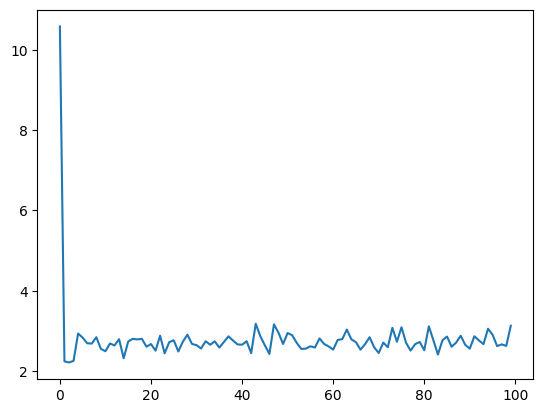

In [43]:
losses = clf.get_losses()
plt.plot(losses)
plt.show()

In [44]:
myweights = clf.get_weights()

df = pd.DataFrame({'weights_for_my_svm' : myweights})
df

,weights_for_my_svm
0,0.046786
1,0.061942
2,-0.101057
3,0.067877
4,-0.039049
5,-0.019499
6,-0.049600
7,0.002642
8,0.028011
9,0.023410


Kernel trick

Существуют случаи, когда мы не можем найти корректный способ провести гиперплоскость, чтобы разделить данные два класса. Есть идея преобразовать данные в другое пространство, чтобы найти гиперплоскость для разделения данных. Для этого нам потребуется выражение Лагранжа.
